In [1]:
import torch
print ('Current cuda device in use: ', torch.cuda.current_device())

Current cuda device in use:  0


In [2]:
from fastai.text import *
import sentencepiece as spm #https://github.com/google/sentencepiece
import os

In [3]:
from tokenizer_utils import CustomTokenizer, SPTokenizer

In [4]:
vocab_size = 600
model_prefix = 'unigram_model'

In [5]:
## load up the Processor
sp = spm.SentencePieceProcessor()
sp.load(f'{model_prefix}.model')

True

In [6]:
itos = []
with open(f'{model_prefix}.vocab','r') as f:
    for line_num,line in enumerate(f):
        itos.append(line.split("\t")[0])

In [7]:
mycust_tok = CustomTokenizer(SPTokenizer, model_prefix)

In [8]:
#setup Vocab object for use in LM
sp_vocab = Vocab(itos)

In [9]:
data = load_data('./','20200811_unigram_model_databunch_data_save.pkl', bs=1200) 

In [10]:
config = awd_lstm_lm_config.copy()
config['qrnn'] = True

learn = language_model_learner(data, AWD_LSTM, pretrained=False, config=config, drop_mult=0.3)

In [11]:
print(learn.model)

SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(600, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(600, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): QRNN(
        (layers): ModuleList(
          (0): QRNNLayer(
            (linear): WeightDropout(
              (module): Linear(in_features=800, out_features=3456, bias=True)
            )
          )
        )
      )
      (1): QRNN(
        (layers): ModuleList(
          (0): QRNNLayer(
            (linear): WeightDropout(
              (module): Linear(in_features=1152, out_features=3456, bias=True)
            )
          )
        )
      )
      (2): QRNN(
        (layers): ModuleList(
          (0): QRNNLayer(
            (linear): WeightDropout(
              (module): Linear(in_features=1152, out_features=1200, bias=True)
            )
          )
        )
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDro

In [12]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.45E-03
Min loss divided by 10: 3.02E-02


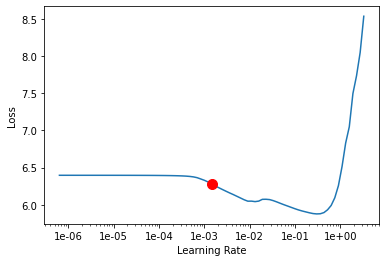

In [13]:
learn.recorder.plot(suggestion=True)

In [14]:
learn.fit_one_cycle(1, slice(1e-2, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,2.270355,2.278681,0.475198,13:58


In [15]:
learn.save('20200820_fit_head_unigram_model_qrnn')

In [16]:
learn.load('20200820_fit_head_unigram_model_qrnn');

In [17]:
learn.unfreeze()

In [18]:
learn.fit_one_cycle(30, slice(1e-2, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,2.214699,2.237679,0.481865,14:00
1,2.163913,2.198416,0.487911,13:59
2,2.098856,2.160469,0.493419,13:59
3,2.058215,2.134384,0.497109,14:01
4,2.036539,2.114402,0.499685,14:00
5,2.028574,2.108875,0.500313,14:01
6,2.008492,2.095479,0.501855,14:00
7,2.001233,2.092030,0.502543,14:01
8,1.997252,2.078012,0.504857,14:01
9,1.983610,2.065966,0.506488,14:02


In [19]:
learn.save('20200820_fine_tuned_unigram_model_qrnn')

In [20]:
learn.load('20200820_fine_tuned_unigram_model_qrnn');

In [21]:
TEXT = "import from"
N_WORDS = 25
N_SENTENCES = 3
for _ in range(N_SENTENCES):
    predicted = learn.predict(TEXT, N_WORDS, temperature=0.9)
    val = predicted.replace(TEXT, '')
    decoded = sp.decode_pieces(val.split())
    print(TEXT + " "+  decoded)

import from _any absolute_uri(list(button_sort_attribute
import from .bin import BlockNumber, from_pygments=100, 
import from _url as proxy_url = ('https: / / support.b


In [22]:
print(learn.summary()) 

SequentialRNN
Layer (type)         Output Shape         Param #    Trainable 
RNNDropout           [70, 400]            0          False     
______________________________________________________________________
RNNDropout           [70, 1152]           0          False     
______________________________________________________________________
RNNDropout           [70, 1152]           0          False     
______________________________________________________________________
Linear               [70, 600]            240,600    True      
______________________________________________________________________
RNNDropout           [70, 400]            0          False     
______________________________________________________________________

Total params: 240,600
Total trainable params: 240,600
Total non-trainable params: 0
Optimized with 'torch.optim.adam.Adam', betas=(0.9, 0.99)
Using true weight decay as discussed in https://www.fast.ai/2018/07/02/adam-weight-decay/ 
Loss function

In [23]:
TEXT = "from pandas import"
N_WORDS = 25
N_SENTENCES = 5
for _ in range(N_SENTENCES):
    predicted = learn.predict(TEXT, N_WORDS, temperature=0.9)
    val = predicted.replace(TEXT, '')
    decoded = sp.decode_pieces(val.split())
    print(TEXT + " "+  decoded)

from pandas import convertible_pages if len(x) > 1: for page in x
from pandas import SourceProblems xxrep 8 - Not propag
from pandas import final_image FIRST_MIN_DIRECTORY_
from pandas import effective_slice, check_for_slice, la
from pandas import DataFrame siblings if x == locals()[x]:


In [ ]:
2